In [1]:
import pandas as pd

dfInfo = pd.read_csv('./dataset_information2.csv', encoding='cp949')[['Dataset Name', 'Modality', 'Body Part', 'Sub-region', 'Segmentation Targets', 'Dimension', 'Secure', 'Link']]
dfInfo = dfInfo[dfInfo['Secure'] == 'O']
existDs = dfInfo['Dataset Name'].tolist()
print(len(dfInfo))
dfInfo

137


,Dataset Name,Modality,Body Part,Sub-region,Segmentation Targets,Dimension,Secure,Link
0,AbdomenCT-1K,CT,Abdomen,-,"Liver, kidneys, pancreas, spleen",3D,O,https://github.com/JunMa11/AbdomenCT-1K
1,AMOS 2022,CT/MR,Abdomen,-,Abdominal organ,3D,O,https://amos22.grand-challenge.org/
2,AutoPET2023,CT/PET,Body,-,Whole-body tumor,3D,O,https://wiki.cancerimagingarchive.net/pages/vi...
3,COVID-19 Seg. Challenge,CT,Thorax,Lung,COVID-19 infections,3D,O,https://covid-segmentation.grand-challenge.org...
4,COVID-19-CT-Seg,CT,Thorax,Lung,"COVID-19 infections, Left Lung, Right Lung",3D,O,https://github.com/JunMa11/COVID-19-CT-Seg-Ben...
...,...,...,...,...,...,...,...,...
152,RBIS-DDSM,X-ray,Thorax,Breast,Breast Cancer,2D,O,https://ieee-dataport.org/documents/re-curated...
153,BSISeg,X-ray,Pelvis,-,bone,2D,O,https://ieee-dataport.org/documents/bone-scan-...
154,InnerEarSeg,CT,Head and Neck,Ear,INNER EAR,3D,O,https://ieee-dataport.org/documents/ct-trainin...
155,3DLSC-COVID,CT,Thorax,Chest,"COVID-19, CAP",3D,O,https://ieee-dataport.org/documents/3dlsc-covid


/tmp/ipykernel_3305284/2253539350.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  cntBymodality = pd.value_counts(dfInfo['Modality'].values, sort=True)


<Axes: ylabel='count'>

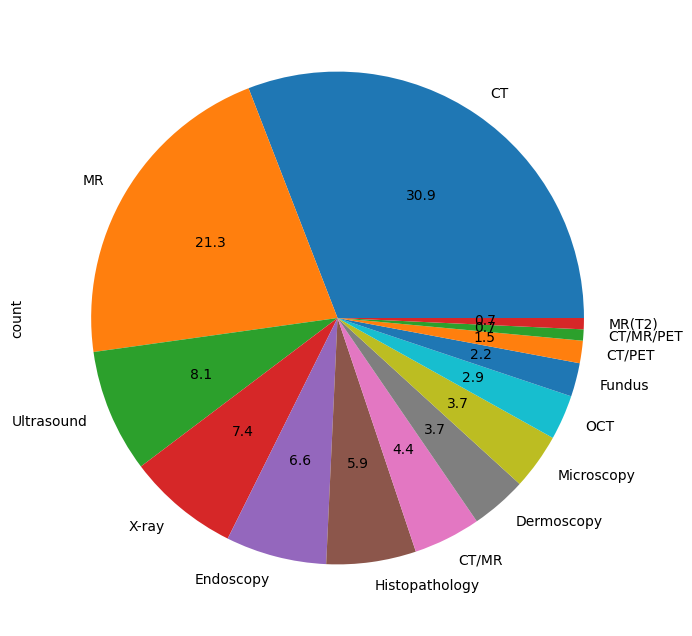

In [7]:
import matplotlib
cntBymodality = pd.value_counts(dfInfo['Modality'].values, sort=True)
#cntBymodality.plot.pie()
cntBymodality.plot.pie(figsize=(10,8), fontsize=10, autopct='%.1f')

#fig.show()
#cntBymodality.plot.bar()
#cntBymodality.plot.bar(grid=True, figsize=(10,8), fontsize=15)
#dfTestSave.groupby('Modality').count()['Dataset Name'].sort_values(ascending=False)

In [8]:
cntBymodality

CT                42
MR                29
Ultrasound        11
X-ray             10
Endoscopy          9
Histopathology     8
CT/MR              6
Dermoscopy         5
Microscopy         5
OCT                4
Fundus             3
CT/PET             2
CT/MR/PET          1
MR(T2)             1
Name: count, dtype: int64

In [9]:
# foundation model list-up
dfFoundation = pd.read_csv('foundation_models.csv')
trainSet, testSet = {'dataset' : [], 'model' : []}, {'dataset' : [], 'model' : []}

for col in dfFoundation.columns.tolist():
    llr = dfFoundation[col].dropna().tolist()
    if llr[1] == 'Train dataset':
        trainSet['dataset'] = trainSet['dataset'] + llr[2:]
        trainSet['model'].append(llr[0])
    else:
        testSet['dataset'] = testSet['dataset'] + llr[2:]
        testSet['model'].append(llr[0])



print(f'[Train] {len(trainSet["dataset"])}')
print(f'[Test] {len(testSet["dataset"])}')

[Train] 268
[Test] 35


In [10]:
import re

def refiendByYear(ds):
    origin2result = {}
    result = []
    for dsN in ds:
        if dsN[-1].isdigit():
            year = re.findall(r'\d+', dsN)[-1]
            refienddsN = dsN[:-len(year)].strip() + ' '
            refienddsN += year if len(year) == 4 else ('20' + year)
        else:
            refienddsN = dsN
        result.append(refienddsN)
        origin2result[refienddsN] = dsN
    return result, origin2result

In [11]:
# existDataset - trainDataset
# 1. 중복 제거
existDs2 = list(set(existDs))
trainDs2 = list(set(trainSet["dataset"]))
print(f'[중복 제거 후]\n- 구축 데이터셋 ({len(existDs)} -> {len(existDs2)})\n- 학습에 사용한 데이터셋 ({len(trainSet["dataset"])} -> {len(trainDs2)})')

# 0. 전처리
existDs2, existMap = refiendByYear(existDs2)
trainDs2, _ = refiendByYear(trainDs2)

# 1차 검사 - 이름이 완전 일치하는 똑같은 데이터셋 삭제
TestSet = list(set(existDs2) - set(trainDs2))
print(f'[검사 후]\n- 테스트 가능 데이터셋 : {len(TestSet)}')
print(TestSet)

[중복 제거 후]
- 구축 데이터셋 (137 -> 137)
- 학습에 사용한 데이터셋 (268 -> 231)
[검사 후]
- 테스트 가능 데이터셋 : 58
['GlaS@MICCAI 2015', 'BSISeg', 'BCSS', 'kvasir', 'RAVIR', 'MSD_Hippocampus', 'Uwaterloo Skin Cancer', 'FLARE 2023', 'Med-DDPM', 'VESsel 2012', 'CC-Tumor Heterogeneity', 'SPIDER', 'SEMI3D 2013', 'MoNuSAC 2020', 'DRIVE', 'SegRap 2023', 'ToothFairy', 'InnerEarSeg', 'Shifts 2022', 'BrainPTM', 'PAPILA', 'MouseEmbryoSeg', '3DLSC-COVID', 'ARCADE', '3DTeethSeg 2022', 'PASeg', 'HCC-TACE-Seg', 'TIGER', 'IDRiD', 'TDSC-ABUS 2023', 'ATLAS 2023', 'ICIAR 2018', 'COVID-19 Radiography', 'VALDo', 'MSD_Heart', 'LOLA 2011', 'BGUSIM', 'LiTS 2017', 'MSD_Brain', 'PathologyIMagesForGlandSeg', 'Bonbid-Hie 2023', 'crossMoDA 2021', 'AutoPET 2023', 'EDD 2020', 'MitoEM', 'SEG.A. 2023', 'ONETOMANY_TOOLSYNSEG', 'SMRA 2021', 'Curious 2022', 'MSD-Hepatic', 'QUBIQ 2021', 'SegPC 2021', 'RBIS-DDSM', 'CrossModa 2022', 'ULS 2023', 'WSSS4LUAD', 'NSCLC Pleural Effusion(PleThora)', 'DRAC 2022']


In [12]:
# Test용 데이터셋 정보까지 합친 dataframe create
dfTestSave = pd.DataFrame({
    'Dataset Name' : [], 'Modality' : [], 'Body Part' : [], 'Sub-region' : [], 'Segmentation Targets' : [], 'Dimension' : []
})
dfTestSave
for tsN in TestSet:
    rawName = existMap[tsN]
    dfNew = dfInfo[dfInfo['Dataset Name'] == rawName]
    dfTestSave = pd.concat([dfTestSave, dfNew])

dfTestSave = dfTestSave.sort_values(by='Modality')
dfTestSave.to_csv('./ExternalEval.csv', index=False)
dfTestSave.head(10)

,Dataset Name,Modality,Body Part,Sub-region,Segmentation Targets,Dimension,Secure,Link
140,SEG.A. 2023,CT,Abdomen,-,Aortic Vessel Tree,3D,O,https://multicenteraorta.grand-challenge.org/
22,NSCLC Pleural Effusion(PleThora),CT,Thorax,Lung,"Lung, Pleural effusion",3D,O,https://wiki.cancerimagingarchive.net/pages/vi...
155,3DLSC-COVID,CT,Thorax,Chest,"COVID-19, CAP",3D,O,https://ieee-dataport.org/documents/3dlsc-covid
125,LOLA11,CT,Thorax,Lung,"Lung, Lobe",3D,O,https://lola11.grand-challenge.org/Home/
91,LiTS17,CT,Abdomen,Liver,"Liver, Tumor",3D,O,https://competitions.codalab.org/competitions/...
154,InnerEarSeg,CT,Head and Neck,Ear,INNER EAR,3D,O,https://ieee-dataport.org/documents/ct-trainin...
105,ToothFairy,CT,Head and Neck,Mandible,Mandibular Cana,3D,O,https://ditto.ing.unimore.it/toothfairy/
109,SegRap2023,CT,Head and Neck,-,"45 OARs and 2 GTVs: Brain, Brainstem, Chiasm, ...",3D,O,https://segrap2023.grand-challenge.org/
86,VESsel12,CT,Thorax,Lung,Blood vessels,3D,O,https://vessel12.grand-challenge.org/
6,HCC-TACE-Seg,CT,Abdomen,Liver,"Liver, Tumor(HCC)",3D,O,https://wiki.cancerimagingarchive.net/pages/vi...


---


/tmp/ipykernel_3305284/1199477578.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  cntBymodality = pd.value_counts(dfTestSave['Modality'].values, sort=True)


<Axes: >

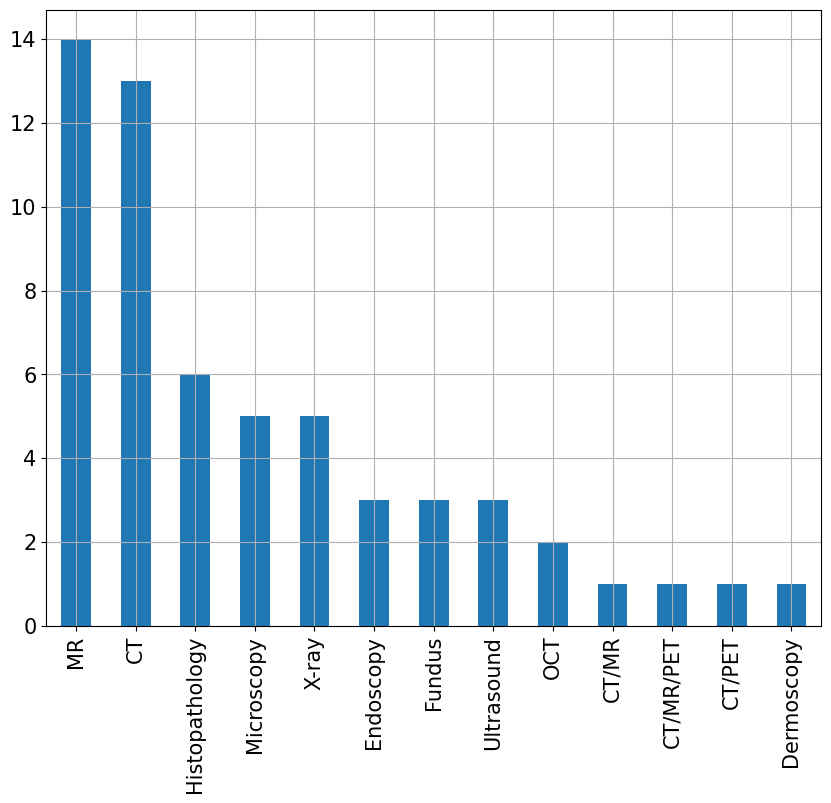

In [13]:
import matplotlib
cntBymodality = pd.value_counts(dfTestSave['Modality'].values, sort=True)
cntBymodality.plot.bar()
cntBymodality.plot.bar(grid=True, figsize=(10,8), fontsize=15)
#dfTestSave.groupby('Modality').count()['Dataset Name'].sort_values(ascending=False)

In [14]:
dfTestSave[dfTestSave['Modality'] == 'OCT']

,Dataset Name,Modality,Body Part,Sub-region,Segmentation Targets,Dimension,Secure,Link
123,DRIVE,OCT,Head and Neck,Eye,Vessel,2D,O,https://drive.grand-challenge.org/
136,DRAC2022,OCT,Head and Neck,Eye,Diabetic Retinopathy Lesions.,2D,O,https://drac22.grand-challenge.org/Description/
